<a href="https://colab.research.google.com/github/Raj800/neuralnets/blob/main/Fashion_MNIST_AutoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## AutoKeras

In [ ]:
!pip install -q git+https://github.com/keras-team/keras-tuner.git
!pip install -q autokeras

     |████████████████████████████████| 174kB 5.7MB/s 


In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

# Train
train_fasion_mnist = tfds.as_numpy(tfds.load("fashion_mnist", split="train", batch_size=-1))
X_train, y_train   = train_fasion_mnist["image"], train_fasion_mnist["label"]

# Test
test_fasion_mnist  = tfds.as_numpy(tfds.load("fashion_mnist", split="test", batch_size=-1))
X_test, y_test     = test_fasion_mnist["image"], test_fasion_mnist["label"]
train_images = X_train.reshape((60000, 28, 28, 1))
test_images = X_test.reshape((10000, 28, 28, 1))
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0
train_labels = y_train
test_labels = y_test
print("Train Samples:", len(X_train))
print("Test Samples:",  len(X_test))

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHETZE2/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteHETZE2/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Train Samples: 60000
Test Samples: 10000


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defines the options for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    fill_mode='nearest'
)

def image_augmentation(image, nb_of_augmentation):
    '''
    Generates new images bei augmentation
    image : raw image
    nb_augmentation: number of augmentations
    images: array with new images
    '''
    images = []
    image = image.reshape(1, img_height, img_width, channels)
    i = 0
    for x_batch in datagen.flow(image, batch_size=1):
        images.append(x_batch)
        i += 1
        if i >= nb_of_augmentation:
            # interrupt augmentation
            break
    return images

In [ ]:
import tensorflow as tf

def preprocess_data(images, targets, use_augmentation=False, nb_of_augmentation=1):
    """
    images: raw image
    targets: target label
    use_augmentation: True if augmentation should be used
    nb_of_augmentation: If use_augmentation=True, number of augmentations
    """
    X = []
    y = []
    for x_, y_ in zip(images, targets):
        
        # scaling pixels between 0.0-1.0
        x_ = x_ / 255.
        
        # data Augmentation
        if use_augmentation:
            argu_img = image_augmentation(x_, nb_of_augmentation)
            for a in argu_img:
                X.append(a.reshape(img_height, img_width, channels))
                y.append(y_)

        X.append(x_)
        y.append(y_)
    print('*Preprocessing completed: %i samples\n' % len(X))
    return np.array(X), tf.keras.utils.to_categorical(y)

In [ ]:
img_width  = 28
img_height = 28
channels   = 1

X_train_shaped, y_train_shaped = preprocess_data(
    X_train, y_train, 
    use_augmentation=True, 
    nb_of_augmentation=3
)

X_test_shaped, y_test_shaped   = preprocess_data(X_test,  y_test)

*Preprocessing completed: 240000 samples

*Preprocessing completed: 10000 samples



In [ ]:
import autokeras as ak

model_ak = ak.ImageClassifier(
    objective="val_accuracy",
    overwrite=True,
    max_trials=1)

from sklearn.model_selection import train_test_split


X_train_, X_val_, y_train_, y_val_ = train_test_split(X_train_shaped, y_train_shaped,
                                                        test_size=0.2, random_state=42)

# Feed the image classifier with training data.
model_ak.fit(X_train_shaped, y_train_shaped,    
             verbose=1,
             validation_split=0.2)

Trial 1 Complete [00h 12m 03s]
val_accuracy: 0.917395830154419

Best val_accuracy So Far: 0.917395830154419
Total elapsed time: 00h 12m 03s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Epoch 1/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.5322 - accuracy: 0.8101


Epoch 2/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.3350 - accuracy: 0.8796


Epoch 3/24
7500/7500 [==============================] - 23s 3ms/step - loss: 0.3032 - accuracy: 0.8911


Epoch 4/24
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2880 - accuracy: 0.8955


Epoch 5/24
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2777 - accuracy: 0.9003


Epoch 6/24
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2667 - accuracy: 0.9030


Epoch 7/24
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2641 - accuracy: 0.9040


Epoch 8/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2596 - accuracy: 0.9058


Epoch 9/24
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2538 - accuracy: 0.9070


Epoch 10/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2501 - accuracy: 0.9092


Epoch 11/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2494 - accuracy: 0.9093


Epoch 12/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2471 - accuracy: 0.9095


Epoch 13/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2442 - accuracy: 0.9111


Epoch 14/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2426 - accuracy: 0.9118


Epoch 15/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2419 - accuracy: 0.9121


Epoch 16/24
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2390 - accuracy: 0.9128


Epoch 17/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2382 - accuracy: 0.9124


Epoch 18/24
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2370 - accuracy: 0.9129


Epoch 19/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2384 - accuracy: 0.9129


Epoch 20/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2345 - accuracy: 0.9149


Epoch 21/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2327 - accuracy: 0.9152


Epoch 22/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2320 - accuracy: 0.9153


Epoch 23/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2333 - accuracy: 0.9150


Epoch 24/24
7500/7500 [==============================] - 24s 3ms/step - loss: 0.2312 - accuracy: 0.9152


INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


In [ ]:
model_ak = model_ak.export_model()
model_ak.save('/content/drive/MyDrive/tf_autokeras/cnn_ak.h5')
model_ak.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0     

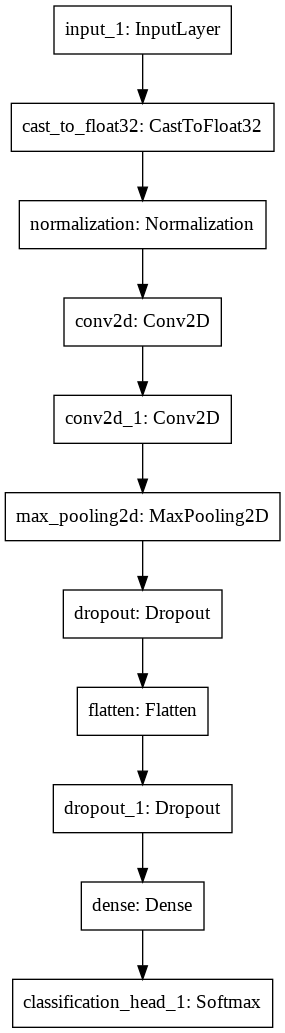

In [ ]:
tf.keras.utils.plot_model(model_ak)

In [ ]:
# Evaluate the best model with testing data.
_, ak_model_test_accuracy = model_ak.evaluate(test_images_norm, tf.keras.utils.to_categorical(test_labels), verbose=0)
_, ak_model_train_accuracy = model_ak.evaluate(X_train_, y_train_, verbose=0)
_, ak_model_val_accuracy = model_ak.evaluate(X_val_, y_val_, verbose=0)
_, ak_model_trainval_accuracy = model_ak.evaluate(train_images_norm, tf.keras.utils.to_categorical(train_labels), verbose=0)

print('autokeras train accuracy:\t', ak_model_train_accuracy)
print('autokeras val accuracy:\t', ak_model_val_accuracy)
print('autokeras trainval accuracy:\t', ak_model_trainval_accuracy)
print('autokeras test accuracy:\t', ak_model_test_accuracy)

autokeras train accuracy:	 0.9394426941871643
autokeras val accuracy:	 0.9390624761581421
autokeras trainval accuracy:	 0.9481666684150696
autokeras test accuracy:	 0.9161999821662903


In [ ]:
import os
import zipfile
import glob
h5s = glob.glob('/content/drive/MyDrive/tf_autokeras/cnn_*.h5')
for h5 in h5s:
    with zipfile.ZipFile(h5.split('.')[0]+'.zip', 'w', compression=zipfile.ZIP_DEFLATED) as f:
        f.write(h5)
        print((h5.split('.')[0]+'.zip'))
!ls -l --block-size=K /content/drive/MyDrive/tf_autokeras/*zip

/content/drive/MyDrive/tf_autokeras/cnn_ak.zip
-rw------- 1 root root 406K Feb  3 08:15 /content/drive/MyDrive/tf_autokeras/cnn_ak.zip
